https://plot.ly/ipython-notebooks/

  **Table of Contents**

  <div id="toc"></div>
  <script type="text/javascript"
  src="https://raw.github.com/kmahelona/ipython_notebook_goodies/master/ipython_notebook_toc.js">
  </script>


# Scatter plots

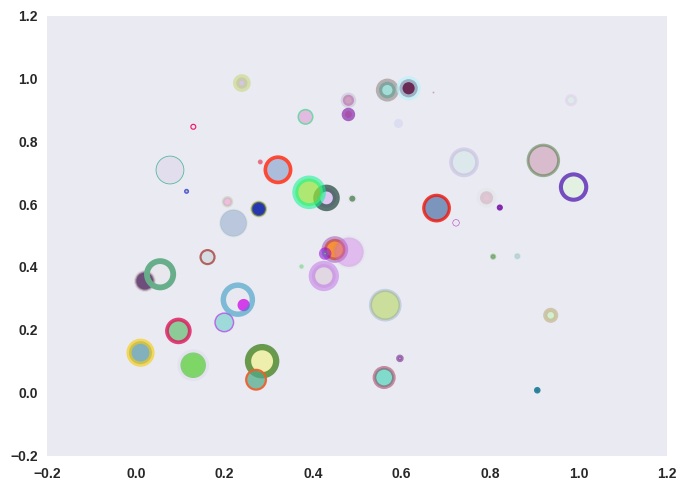

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py

n = 50
x, y, z, s, ew = np.random.rand(5, n)
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 500, 5

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=c,
                s=np.square(s)*area_scale,
                edgecolor=ec,
                linewidth=ew*width_scale)
ax.grid()

# py.iplot_mpl(fig,sharing='secret')

In [8]:
init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

In [9]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [7]:
#https://plot.ly/python/offline/
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Bar, Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])


'file:///home/takanori/Dropbox/git/ipynb-notes/plotly/temp-plot.html'

# Box plots

In [10]:
from plotly.graph_objs import *
import numpy as np
iplot([Box(y = np.random.randn(50), showlegend=False) for i in range(45)], show_link=False)

# Heatmap

In [11]:
x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

# Sized bubble plots

In [14]:

import pandas as pd
df = pd.read_csv('https://plot.ly/~etpinard/191.csv')

iplot({
    'data': [
        Scatter(x=df[continent+'_Life Expentancy [in years]'],
                y=df[continent+'_Gross Domestic Product per Capita [in USD of the year 2000]'],
                text=df[continent+'_text'],
                marker=Marker(size=df[continent+'_marker.size'], sizemode='area', sizeref=131868,),
                mode='markers',
                name=continent) for continent in ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
    ],
    'layout': Layout(xaxis=XAxis(title='Life Expectancy'), yaxis=YAxis(title='GDP per Capita', type='log'))
}, show_link=False)


# Time series

In [15]:
import cufflinks as cf

In [17]:
iplot(cf.datagen.lines().iplot(asFigure=True,
                               kind='scatter',xTitle='Dates',yTitle='Returns',title='Returns'))

# heatmap again

In [18]:
iplot(cf.datagen.heatmap(20,20).iplot(asFigure=True,
                                      kind='heatmap',colorscale='spectral',title='Cufflinks - Heatmap'))

# Airflight map

In [19]:
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )
    
layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=flight_paths + airports, layout=layout )

iplot(fig)

# Use of py.get_figure

In [20]:
import plotly.plotly as py # all methods in plotly.plotly will communicate with a Plotly Cloud or Plotly Enterprise

# get_figure downloads a figure from plot.ly or Plotly Enterprise. 
# You need to provide credentials to download figures: https://plot.ly/python/getting-started/
fig = py.get_figure('https://plot.ly/~jackp/8715', raw=True)
iplot(fig)